# BA870 Final Project
### Jingjing Lu

In [ ]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mstats
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import os

# Set your working directory to a folder in your Google Drive. This way, if your notebook times out,
# your files will be saved in your Google Drive!

# the base Google Drive directory
root_dir = "/content/gdrive/MyDrive/Summer/"

# choose where you want your project files to be saved
project_folder = "BA870/"

def create_and_set_working_directory(project_folder):
  # check if your project folder exists. if not, it will be created.
  if os.path.isdir(root_dir + project_folder) == False:
    os.mkdir(root_dir + project_folder)
    print(root_dir + project_folder + ' did not exist but was created.')

  # change the OS to use your project folder as the working directory
  os.chdir(root_dir + project_folder)

  # create a test file to make sure it shows up in the right place
  !touch 'new_file_in_working_directory.txt'
  print('\nYour working directory was changed to ' + root_dir + project_folder + \
        "\n\nAn empty text file was created there. You can also run !pwd to confirm the current working directory." )

create_and_set_working_directory(project_folder)


Your working directory was changed to /content/gdrive/MyDrive/Summer/BA870/

An empty text file was created there. You can also run !pwd to confirm the current working directory.


## Data import

In [ ]:
temp1= pd.read_csv("temp1.csv")
temp2= pd.read_csv("temp2.csv")

In [ ]:
#merging datasets
stock= pd.merge(temp1, temp2, on= "tic")
stock.head()

,tic,RetEarly2020,RetLate2020,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,...,at,ch,dltt,ebit.1,lct,tie,city,invt,emp,cogs
0,JJSF,-0.340234,0.300340,12825,20190930,2019,INDL,C,D,STD,...,1019.339,192.395,0.718,116.956,121.234,NaN,Pennsauken,116.165,4.6,787.541
1,PLXS,-0.290876,0.433469,12945,20190930,2019,INDL,C,D,STD,...,2000.883,223.761,187.278,143.733,865.503,NaN,Neenah,700.938,19.0,2820.390
2,HNGR,-0.435712,0.411425,16456,20191231,2019,INDL,C,D,STD,...,842.253,74.419,578.539,66.928,208.406,NaN,Austin,68.204,4.8,995.193
3,ORCL,-0.083596,0.356166,12142,20200531,2019,INDL,C,D,STD,...,115438.000,37239.000,70726.000,14139.000,17200.000,NaN,Austin,211.000,135.0,6556.000
4,MSFT,0.003212,0.421139,12141,20190630,2019,INDL,C,D,STD,...,286556.000,11356.000,79107.000,42959.000,69420.000,NaN,Redmond,2063.000,144.0,31310.000


#### Creating ratios:
- Price/Book = (PRCC_C * CSHO ) / CEQ
- P/E = (PRCC_C * CSHO ) / NI
- P/EBIT = (PRCC_C * CSHO ) / EBIT
- P/SALES = (PRCC_C * CSHO ) / SALE
- Cash to total asset= ch/at
- Cash to current liabilities= ch/lct
- Cash to interest expense= ch/tie
- Current ratio= act/lct
- Quick Ratio= (act- invt)/lct
- Inventory turnover= cogs/invt
- Long-term debt to total asset= dltt/at
- EBIT to interest expense= ebit/tie
- Net sales/#employee= sale/emp


In [ ]:
#Creating ratios
stock['Price/Book']= (stock['prcc_c']*stock['csho'])/stock['ceq']
stock['P/E']= (stock['prcc_c']*stock['csho'])/stock['ni']
stock['P/EBIT']= (stock['prcc_c']*stock['csho'])/stock['ebit']
stock['P/SALES']= (stock['prcc_c']*stock['csho'])/stock['sale']
stock['Cash/total_assets']= stock['ch']/stock['at']
stock['Cash/current_liabilities']= stock['ch']/stock['lct']
stock['Cash/interest']= stock['ch']/stock['tie']
stock['current_ratio']= stock['act']/stock['lct']
stock['quick_ratio']= (stock['act']-stock['invt'])/stock['lct']
stock['inventory_turnover']= stock['cogs']/stock['invt']
stock['debt/total_assets']= stock['dltt']/stock['at']
stock['EBIT/interest']= stock['ebit']/stock['tie']
stock['SALES/employee']= stock['sale']/stock['emp']

In [ ]:
#saving new dataframe
stock.to_csv(r'/Users/cecilia/Desktop/ba870/final/final.csv')

## Exploratory Data Analysis

In [ ]:
data= pd.read_csv('/Users/cecilia/Desktop/ba870/final/final.csv', index_col=0)
data.head()

,tic,RetEarly2020,RetLate2020,city,Price/Book,P/E,P/EBIT,P/SALES,Cash/total_assets,Cash/current_liabilities,Cash/interest,current_ratio,quick_ratio,inventory_turnover,debt/total_assets,EBIT/interest,SALES/employee
0,JJSF,-0.340234,0.300340,Pennsauken,4.176045,36.720295,29.770013,2.934530,0.188745,1.586972,NaN,4.176691,3.218503,6.779503,0.000704,NaN,257.931957
1,PLXS,-0.290876,0.433469,Neenah,2.578130,20.545479,15.525786,0.705203,0.111831,0.258533,NaN,1.777338,0.967476,4.023737,0.093598,NaN,166.549158
2,HNGR,-0.435712,0.411425,Austin,108.824769,37.575680,15.453481,0.941919,0.088357,0.357087,NaN,1.514616,1.187351,14.591417,0.686895,NaN,228.759583
3,ORCL,-0.083596,0.356166,Austin,13.457815,16.032527,11.492302,4.159150,0.322589,2.165058,NaN,3.031395,3.019128,31.071090,0.612675,NaN,289.392593
4,MSFT,0.003212,0.421139,Redmond,11.778570,30.716134,28.057010,9.577816,0.039629,0.163584,NaN,2.528839,2.499121,15.176927,0.276061,NaN,873.909722


In [ ]:
# Checking null values
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2673 entries, 0 to 2672
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tic                       2673 non-null   object 
 1   RetEarly2020              2673 non-null   float64
 2   RetLate2020               2673 non-null   float64
 3   city                      2672 non-null   object 
 4   Price/Book                2664 non-null   float64
 5   P/E                       2664 non-null   float64
 6   P/EBIT                    2664 non-null   float64
 7   P/SALES                   2664 non-null   float64
 8   Cash/total_assets         2631 non-null   float64
 9   Cash/current_liabilities  1979 non-null   float64
 10  Cash/interest             285 non-null    float64
 11  current_ratio             2007 non-null   float64
 12  quick_ratio               1980 non-null   float64
 13  inventory_turnover        2545 non-null   float64
 14  debt/tot

Both Cash to interest expense and EBIT to interest expense have too little datapoints due to the inefficient reported data of interest expense. Thus, I would drop these two ratios for further analysis.

In [ ]:
data= data.drop(columns=['Cash/interest', 'EBIT/interest'])

In [ ]:
data.describe().T

/Users/cecilia/opt/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


,count,mean,std,min,25%,50%,75%,max
RetEarly2020,2673.0,-0.290638,0.313193,-0.908665,-0.440494,-0.312085,-0.170593,7.512067e+00
RetLate2020,2673.0,0.804096,1.073392,-0.858458,0.252399,0.546460,1.000473,1.899385e+01
Price/Book,2664.0,3.823617,52.686755,-1423.217345,1.321887,2.345062,4.700172,1.503128e+03
P/E,2664.0,13.241793,763.284866,-21456.838040,-2.718839,14.616061,27.293262,2.247225e+04
P/EBIT,2664.0,-5.526611,573.266634,-23037.700770,4.839963,10.233583,19.737916,6.129584e+03
P/SALES,2664.0,inf,NaN,0.021662,1.139382,2.590081,5.374129,inf
Cash/total_assets,2631.0,0.126276,0.175842,0.000000,0.017569,0.058903,0.155531,9.973521e-01
Cash/current_liabilities,1979.0,1.307235,3.615904,0.000000,0.179040,0.478380,1.120724,7.063185e+01
current_ratio,2007.0,3.196440,5.554320,0.146189,1.227300,1.855734,3.174488,1.327606e+02
quick_ratio,1980.0,2.356662,8.963229,-251.356854,0.889587,1.438089,2.659187,1.327606e+02


### 1. Plotting distribution

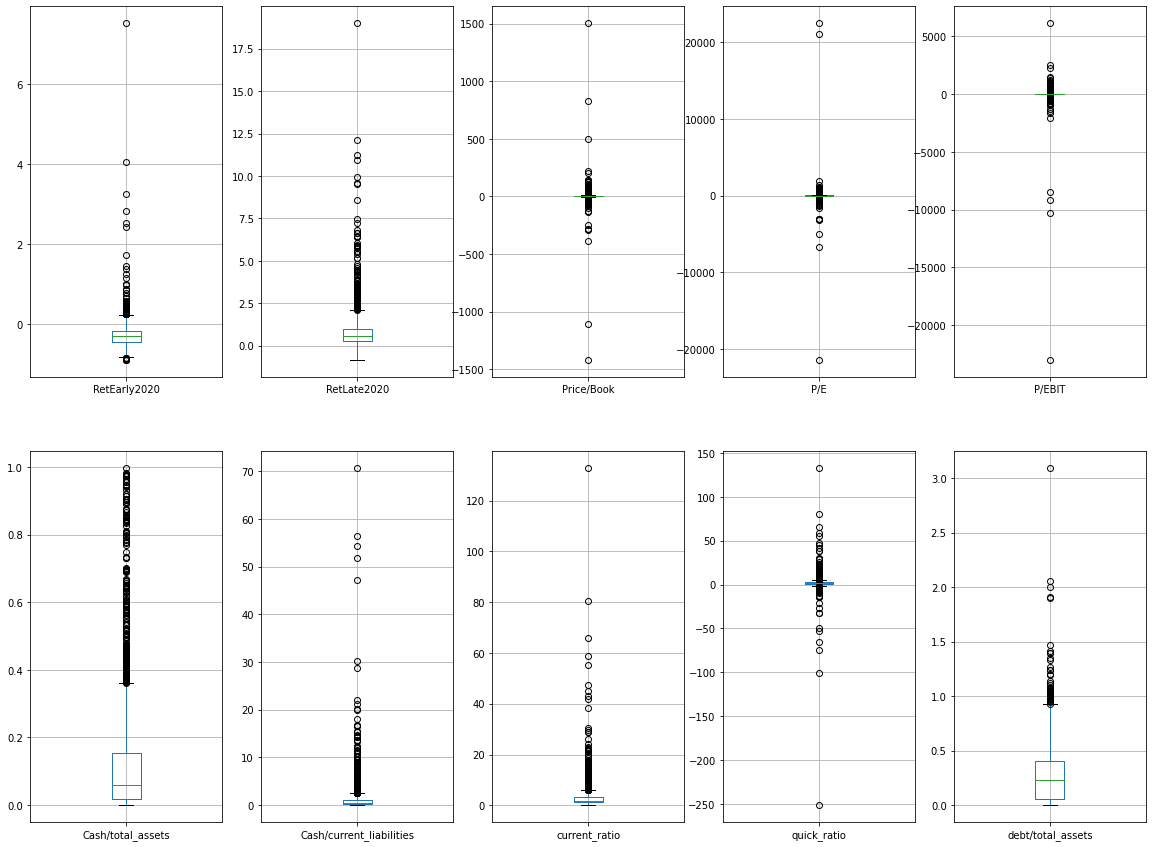

In [ ]:
# infinity values not able to be plotted
numeric_col= list(data.drop(columns=['inventory_turnover', 'SALES/employee','P/SALES']).describe(include= [np.number]).columns)
stock_numeric= data[numeric_col]
fig, axes= plt.subplots(len(numeric_col)//4,5,figsize=(20,15))
i= 0
for triaxis in axes:
    for axis in triaxis:
        stock_numeric.boxplot(column=numeric_col[i], ax= axis)
        i= i+1

### 2. City difference in stock return before and after covid break

In [ ]:
city_difference= data.groupby(by= 'city')[['RetEarly2020', 'RetLate2020']].mean()
city_difference

,RetEarly2020,RetLate2020
city,,
Abilene,-0.231909,0.365060
Acton,-0.210344,1.868023
Addison,-0.423706,1.736529
Akron,-0.379000,0.550399
Alachua,0.058243,0.142980
...,...,...
Yorktown Heights,-0.307631,0.149398
Yulee,-0.272894,0.285733
Zeeland,-0.348050,0.541396


In [ ]:
city_difference['difference']= city_difference['RetLate2020']- city_difference['RetEarly2020']
city_difference.sort_values(by='difference', ascending=True)

,RetEarly2020,RetLate2020,difference
city,,,
Saint Louis Park,4.049931,2.225995,-1.823936
Gaithersburg,0.553496,-0.072377,-0.625873
Lubbock,0.198314,-0.326705,-0.525018
Bethlehem,0.339975,-0.016264,-0.356239
Singapore,0.169058,-0.160086,-0.329144
...,...,...,...
West Reading,-0.668750,3.542452,4.211202
Las Cruces,-0.146274,4.141488,4.287763
New Hartford,-0.581653,3.882583,4.464235


In [ ]:
city_difference['difference'].describe().T

count    829.000000
mean       1.017641
std        0.804724
min       -1.823936
25%        0.533658
50%        0.885830
75%        1.311971
max        7.027843
Name: difference, dtype: float64

After I groupby the firm location as city variable, there is overall an increase in average stock return after the breakout of covid pandemic with a mean at 1.02 USD. However, by checking the distribution of average difference of return early 2020 and return late 2020, there are firms who experience decreased stock return, and firms doing better than the others. To examine the geo effect on stock return, I will look over the top 5 and bottom 5 cities according to the average stock return difference table presented above.

Bottom 5 cities:
- Saint Louis Park
- Gaithersburg
- Lubborck
- Bethlehem
- Singapore


Top 5 cities:
- West Reading
- Las Cruces
- New Hartford
- Bellingham
- Golden Valley

The bottom 5 cities do not experience a very big difference in average stock return at around -1 to -0.3. The differences here can be explained by the market variance or the company specific factor.
The top 5 cities are not large and populated, also they are surburban. Residents there could be less likely impacted by the covid breakdown. Also, by looking into the industries of the five cities, non of which does manufacturing. For instance, the largest company headquartered in Golden Valley is General Mills, who markets consumer food. Those business are less likely influenced by the pandemic, or even experience boosting effect from increasing demand.

### Sales/#employee difference before and after covid

In [ ]:
df= data[['RetEarly2020', 'RetLate2020', 'SALES/employee']]
df

,RetEarly2020,RetLate2020,SALES/employee
0,-0.340234,0.300340,257.931957
1,-0.290876,0.433469,166.549158
2,-0.435712,0.411425,228.759583
3,-0.083596,0.356166,289.392593
4,0.003212,0.421139,873.909722
...,...,...,...
2668,-0.716471,1.719300,29.337621
2669,-0.409412,0.567728,44.024496
2670,-0.158545,0.422103,21.555578
2671,-0.253901,0.056516,575.403412


Text(0.5, 0, 'SALES/employee')

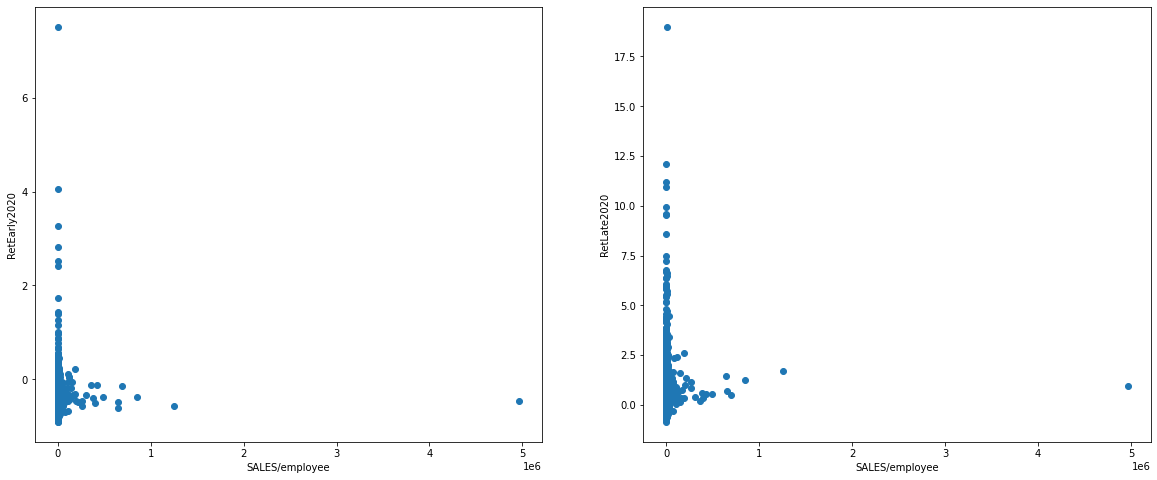

In [ ]:
fit, ax= plt.subplots(1,2,figsize=(20,8))
ax[0].plot(df['SALES/employee'], df['RetEarly2020'], 'o')
ax[0].set_ylabel('RetEarly2020')
ax[0].set_xlabel('SALES/employee')
ax[1].plot(df['SALES/employee'], df['RetLate2020'], 'o')
ax[1].set_ylabel('RetLate2020')
ax[1].set_xlabel('SALES/employee')

We can see from the two graphs, the similar range of sales per employee is correlated with a higher return in late 2020 than in early 2020, which means that the firms who have lower reliance on labor perform better in 2020 after covid shock.

## Data pre-processing
#### Checking missing values, outliers, data errors and winsorizing metrics

### Handling nulls

In [ ]:
nulls= data.isnull().sum().sort_values(ascending= False).to_frame()
nulls.rename(columns= {0: "Nulls"}, inplace= True)
nulls.T

,Cash/current_liabilities,quick_ratio,current_ratio,inventory_turnover,Cash/total_assets,SALES/employee,debt/total_assets,Price/Book,P/E,P/EBIT,P/SALES,city,tic,RetEarly2020,RetLate2020
Nulls,694,693,666,128,42,26,11,9,9,9,9,1,0,0,0


In [ ]:
# Fill with 0
data= data.fillna(0)

In [ ]:
nulls= data.isnull().sum().sort_values(ascending= False).to_frame()
nulls.rename(columns= {0: "Nulls"}, inplace= True)
nulls.T

,tic,RetEarly2020,RetLate2020,city,Price/Book,P/E,P/EBIT,P/SALES,Cash/total_assets,Cash/current_liabilities,current_ratio,quick_ratio,inventory_turnover,debt/total_assets,SALES/employee
Nulls,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Winsorizing Data

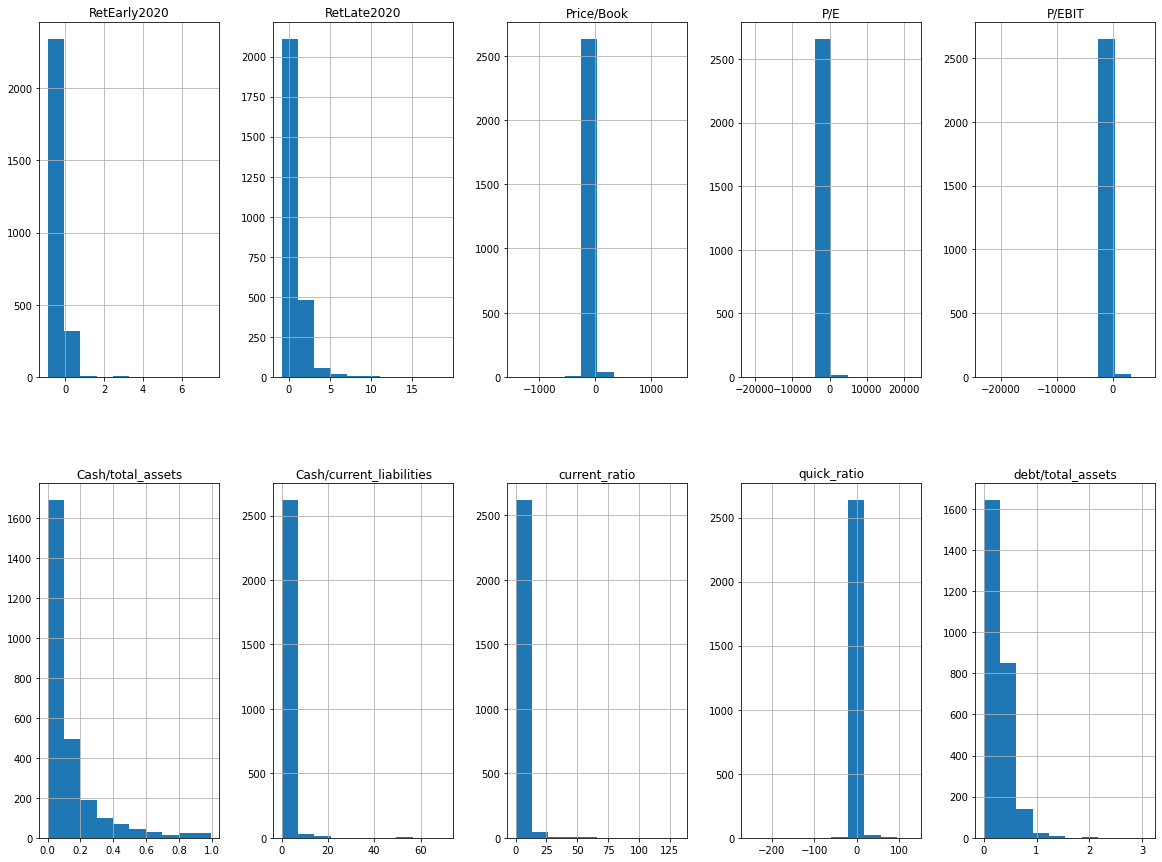

In [ ]:
numeric_col= list(data.drop(columns=['inventory_turnover', 'SALES/employee','P/SALES']).describe(include= [np.number]).columns)
stock_numeric= data[numeric_col]
fig, axes= plt.subplots(len(numeric_col)//4,5,figsize=(20,15))
i= 0
for triaxis in axes:
    for axis in triaxis:
        stock_numeric.hist(column=numeric_col[i], ax= axis)
        i= i+1

In [ ]:
data['Price/Book']= winsorize(data['Price/Book'], limits=[0.01, 0.03])
data['P/E']= winsorize(data['P/E'], limits=[0.01, 0.03])
data['P/EBIT']= winsorize(data['P/EBIT'], limits=[0.01, 0.03])
data['Cash/total_assets']= winsorize(data['Cash/total_assets'], limits=[0.01, 0.03])
data['Cash/current_liabilities']= winsorize(data['Cash/current_liabilities'], limits=[0.01, 0.03])
data['current_ratio']= winsorize(data['current_ratio'], limits=[0.01, 0.03])
data['quick_ratio']= winsorize(data['quick_ratio'], limits=[0.01, 0.03])
data['debt/total_assets']= winsorize(data['debt/total_assets'], limits=[0.01, 0.03])
data['inventory_turnover']= winsorize(data['inventory_turnover'], limits=[0.01, 0.03])
data['P/SALES']= winsorize(data['P/SALES'], limits=[0.01, 0.03])

## Correlation Matrix between ratios and returns

Text(0.5, 1.0, 'Correlation Matrix between Ratios and Returns')

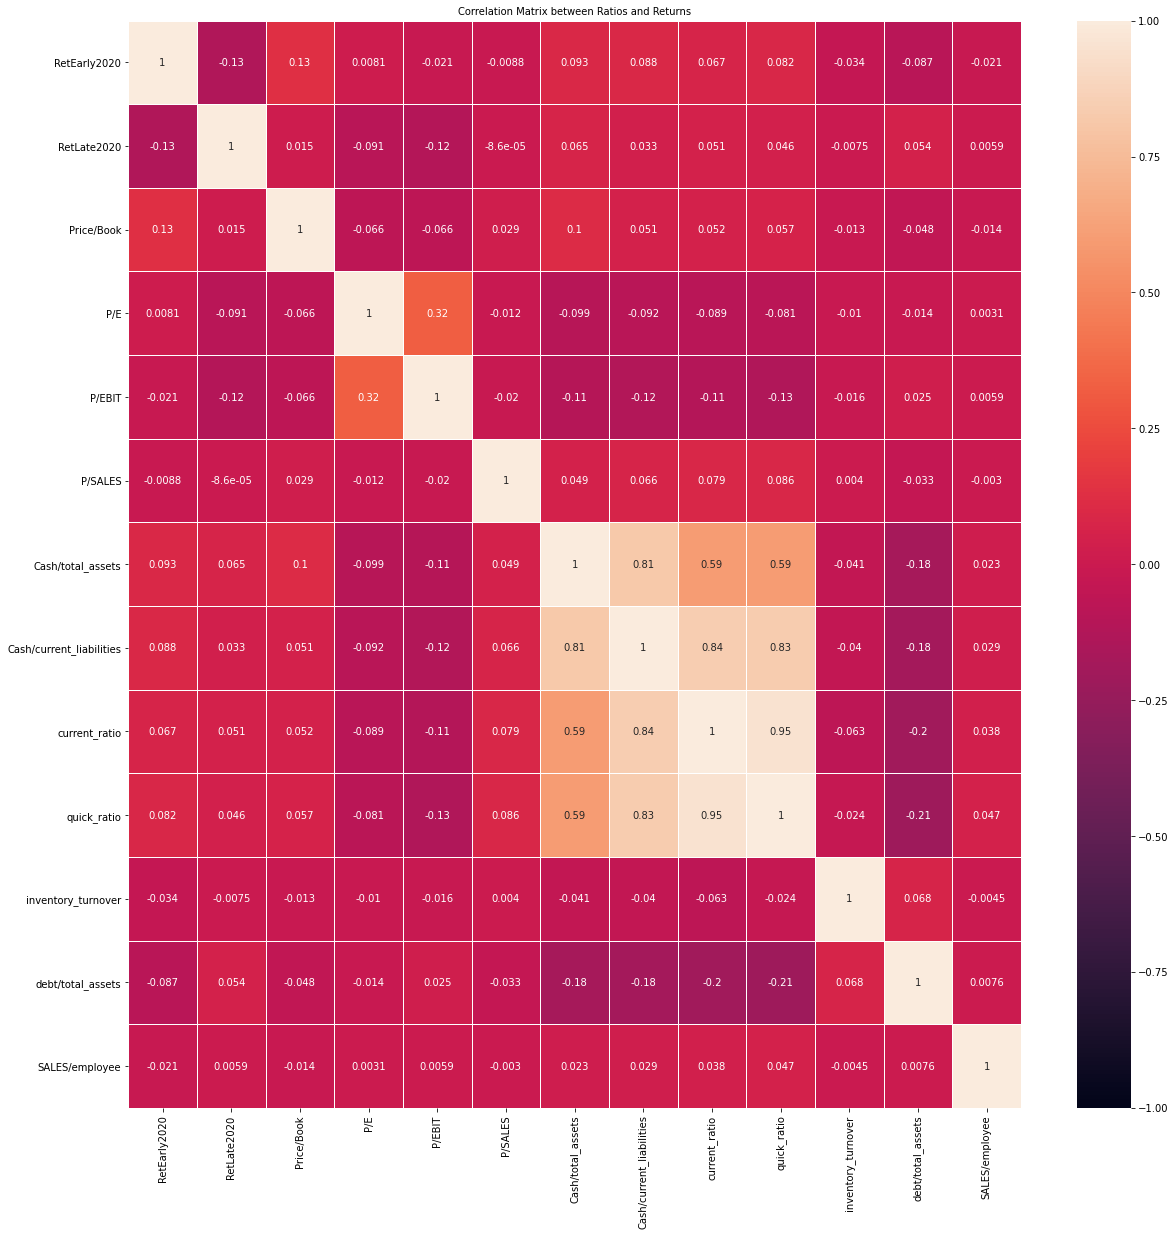

In [ ]:
plt.figure(figsize= (20,20))
corr_matrix= sns.heatmap(data.corr(), vmin= -1, vmax= 1, annot= True, linewidths=.5)
corr_matrix.set_title('Correlation Matrix between Ratios and Returns', fontdict= {'fontsize':10})

Most highly correlated variables:
- current ratio and quick ratio: 95%
- current ratio and cash/current_liabilities: 84%
- quick ratio and cash/current_liabilities: 83%
- cash/current_liabilities and cash/total_assets: 81%
- quick ratio and cash/total assets: 59%

Least correlated variables:
- debt/total_assets and quick ratio: -21%
- debt/total_assets and current ratio: -20%
- debt/total_assets and cash/total_assets: -18%
- debt/total_assets and cash/current_liabilities: -18%
- quick ratio and P/EBIT: -13%

In [ ]:
# P/SALES has the lowest correlation with retearly2020 and retlate2020
# drop P/SALES
data= data.drop(columns=['P/SALES'])

In [ ]:
data.head()

,tic,RetEarly2020,RetLate2020,city,Price/Book,P/E,P/EBIT,Cash/total_assets,Cash/current_liabilities,current_ratio,quick_ratio,inventory_turnover,debt/total_assets,SALES/employee
0,JJSF,-0.340234,0.300340,Pennsauken,4.176045,36.720295,29.770013,0.188745,1.586972,4.176691,3.218503,6.779503,0.000704,257.931957
1,PLXS,-0.290876,0.433469,Neenah,2.578130,20.545479,15.525786,0.111831,0.258533,1.777338,0.967476,4.023737,0.093598,166.549158
2,HNGR,-0.435712,0.411425,Austin,22.550037,37.575680,15.453481,0.088357,0.357087,1.514616,1.187351,14.591417,0.686895,228.759583
3,ORCL,-0.083596,0.356166,Austin,13.457815,16.032527,11.492302,0.322589,2.165058,3.031395,3.019128,31.071090,0.612675,289.392593
4,MSFT,0.003212,0.421139,Redmond,11.778570,30.716134,28.057010,0.039629,0.163584,2.528839,2.499121,15.176927,0.276061,873.909722


In [ ]:
data.describe().T

/Users/cecilia/opt/miniconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:3968: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


,count,mean,std,min,25%,50%,75%,max
RetEarly2020,2673.0,-0.290638,0.313193,-0.908665,-0.440494,-0.312085,-0.170593,7.512067
RetLate2020,2673.0,0.804096,1.073392,-0.858458,0.252399,0.546460,1.000473,18.993847
Price/Book,2673.0,3.538254,6.465039,-31.367242,1.314886,2.340691,4.685833,22.550037
P/E,2673.0,9.448100,63.221269,-383.097533,-2.546082,14.547682,27.269899,138.682338
P/EBIT,2673.0,6.692811,45.012733,-304.220009,4.720426,10.135371,19.713288,81.495766
Cash/total_assets,2673.0,0.118933,0.154120,0.000000,0.016443,0.056351,0.153506,0.645626
Cash/current_liabilities,2673.0,0.730862,1.210984,0.000000,0.000000,0.251532,0.815243,5.294175
current_ratio,2673.0,2.058140,2.398738,0.000000,0.203701,1.412719,2.629059,10.245635
quick_ratio,2673.0,1.688942,2.328873,-2.239154,0.000000,1.064561,1.932549,9.906346
inventory_turnover,2673.0,inf,NaN,0.000000,3.197827,8.943453,NaN,inf


## Multi-variable regressions

### For RetEarly2020

In [ ]:
# Dependent variables
X= data.drop(columns=['RetEarly2020','RetLate2020','tic', 'city', 'inventory_turnover', 'SALES/employee'])
X= sm.add_constant(X)
# Independent variables
y= data['RetEarly2020']
# Fit model
model= sm.OLS(y, X).fit()
# Summary statistics
print(model.summary(title= "Multi-variable effects on RetEarly2020"))

                    Multi-variable effects on RetEarly2020                    
Dep. Variable:           RetEarly2020   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     10.47
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           1.47e-14
Time:                        02:15:31   Log-Likelihood:                -647.75
No. Observations:                2673   AIC:                             1313.
Df Residuals:                    2664   BIC:                             1367.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

#### Summary
- R squared and adjusted r square are respectively 3% and 2.8%.
- RetEarly2020 v current ratio: the coefficient is -0.0181 with a se of 0.009.
- RetEarly2020 v Price/book: the coefficient is 0.0058 with a se of 0.001.
- RetEarly2020 v quick ratio: the coefficient is 0.0171 with a se of 0.008.
- RetEarly2020 v debt/total assets: the coefficient is -0.0976 with a se of 0.029.

### For RetLate2020

In [ ]:
# Dependent variables unchanged
# Independent variables
y= data['RetLate2020']
# Fit model
model= sm.OLS(y, X).fit()
# Summary statistics
print(model.summary(title= "Multi-variable effects on RetLate2020"))

                    Multi-variable effects on RetLate2020                     
Dep. Variable:            RetLate2020   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     10.09
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           5.80e-14
Time:                        02:15:37   Log-Likelihood:                -3941.7
No. Observations:                2673   AIC:                             7901.
Df Residuals:                    2664   BIC:                             7954.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

#### Summary
- R squared and adjusted r square are respectively 2.9% and 2.7%.
- RetLate2020 v Price/equity: the coefficient is -0.0009 with a se of 0.
- RetLate2020 v P/EBIT: the coefficient is -0.0023 with a se of 0.
- RetLate2020 v cash/total assets: the coefficient is 1.0435 with a se of 0.243.
- RetLate2020 v cash/current liabilities: the coefficient is -0.1795 with a se of 0.046.
- RetLate2020 v debt/total assets: the coefficient is 0.3645 with a se of 0.1.

## Conclusions

- Both equations' r squared and adjusted r sqaured are low, which means that the independent variables have low predictive power. Next step can think of new ratios to put in the regressions.
- Debt/ total assets: Firms who have an extra unit of debt to total assets would cause higher return late 2020 than early 2020. This means that firms who have higher holdings of long term debt would have higher stock return after the covid breakout. This would make sense in the case that if total assets is small relative to debt, then earnings generated will result in a high return on assets if the firm is profitable, thus resulting in higher stock price and better panel ratios.
- Cash/total assets: Firms who have an extra unit of cash to total assets would have 1.04 higher stock return in late 2020. This means that the firms who have more cash at the end of 2019 would have higher stock returns in 2020 after covid shock. This makes sense as a higher ratio may indicate some degree of safety as holding more cash on hand. 
- Cash/current_liabilities: Firms who have an extra unit of cash to current liabilities would habe 0.1795 lower stock return in late 2020, which means that firms with more cash to cover current liabilities at the end of 2019 have lower stock returns after covid. This ratio is kind of confusing. Because through common senses, this ratio indicates if the company is capable of generating enough cash flow from its operations to sustain the company in a stable and sound financial position. But after covid, a higher cash to current liabilities ratio results in lower stock return. This could be due to the market flucuations as the economic scale of this effect is small.
- RetLate2020 v Price/equity and P/EBIT generate effects that are too small to consider for further analysis in economic scale.
- Effects of other ratios on stock returns after covid are not statistically significant.